In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import random
from scipy.ndimage import rotate
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout

# 1. Load the Fashion MNIST dataset
Loads the Fashion MNIST dataset, which contains images of clothing divided into 10 classes. The data is available in Keras, making it easy to use.

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# 2. Display sample images from the dataset
Displays sample images from the dataset to better understand the types of images in the training set.

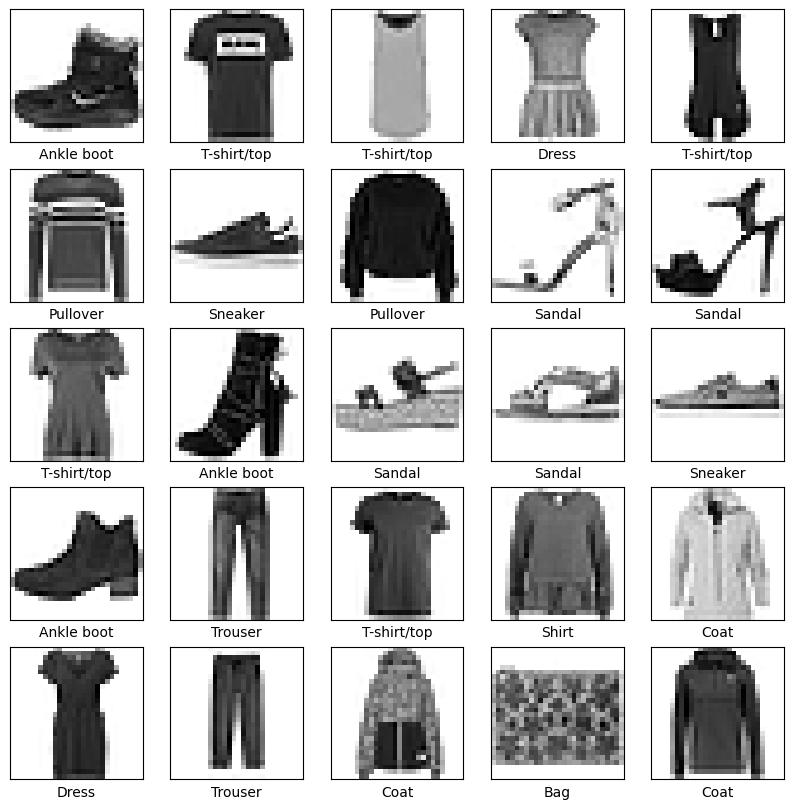

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# 3. Check the balance of the training dataset
# Checks if the training dataset is balanced in terms of the number of examples for each class, which is important for model performance.

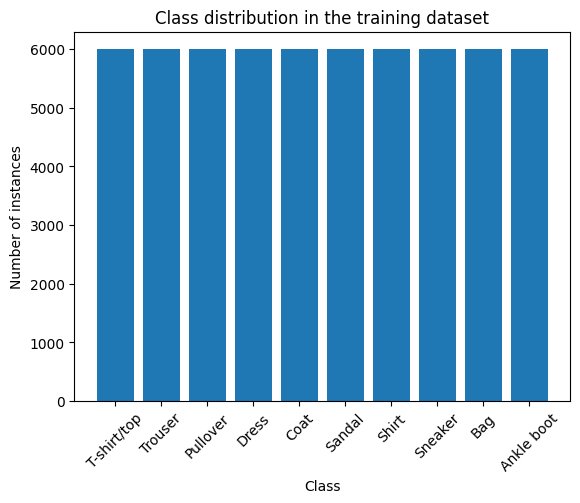

In [ ]:
unique, counts = np.unique(train_labels, return_counts=True)
plt.bar(class_names, counts)
plt.xlabel('Class')
plt.ylabel('Number of instances')
plt.title('Class distribution in the training dataset')
plt.xticks(rotation=45)
plt.show()



# 4. Normalize the data and build a simple CNN model
# Normalizes the data so that pixel values are in the range 0-1, and then builds a simple convolutional neural network for image classification.

In [4]:
train_images, test_images = train_images / 255.0, test_images / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the model
Compiles the model by defining the optimizer, loss function, and evaluation metric to be used during training.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# Train the model
Trains the model on the training data for a specified number of epochs and validates it on the test set.

In [ ]:
history = model.fit(train_images[..., np.newaxis], train_labels, epochs=10,
                    validation_data=(test_images[..., np.newaxis], test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 36ms/step - accuracy: 0.7478 - loss: 0.6884 - val_accuracy: 0.8523 - val_loss: 0.3997
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 35ms/step - accuracy: 0.8793 - loss: 0.3325 - val_accuracy: 0.8900 - val_loss: 0.3068
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.8968 - loss: 0.2765 - val_accuracy: 0.8839 - val_loss: 0.3257
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.9106 - loss: 0.2401 - val_accuracy: 0.9050 - val_loss: 0.2642
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 36ms/step - accuracy: 0.9210 - loss: 0.2156 - val_accuracy: 0.9060 - val_loss: 0.2615
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 34ms/step - accuracy: 0.9281 - loss: 0.1939 - val_accuracy: 0.9079 - val_loss: 0.2592
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 35ms/step - accuracy: 0.9349 - loss: 0.1742 - val_accuracy: 0.9023 - val_loss: 0.2818
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.9399 -

# 5. Evaluate accuracy and plot learning curve
Displays the learning curve to see how the model's accuracy changes during training and validation.

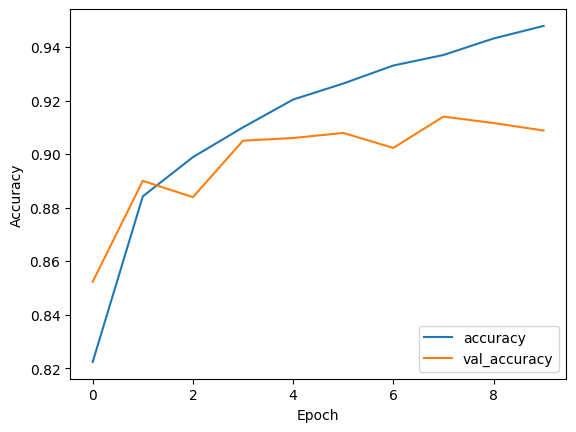

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# 6. Display confusion matrix to see class errors
Generates a confusion matrix to see which classes are most frequently misclassified by the model.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


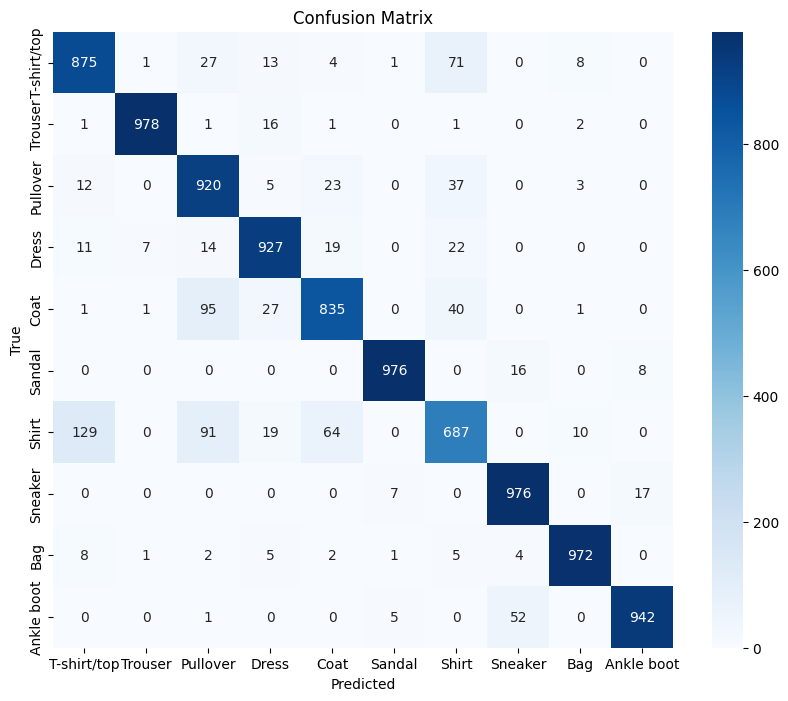

In [ ]:
y_pred = model.predict(test_images[..., np.newaxis])
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(test_labels, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



# 7. Add regularization (Batch Normalization and Dropout)
Adds regularization to the model (batch normalization and dropout) to help prevent overfitting and improve generalization.

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10)
])

# Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model with regularization
Trains the model with added regularization to see the effect on model performance.

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.6770 - loss: 0.9311 - val_accuracy: 0.8538 - val_loss: 0.3881
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.8355 - loss: 0.4641 - val_accuracy: 0.8792 - val_loss: 0.3321
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8597 - loss: 0.4039 - val_accuracy: 0.8726 - val_loss: 0.3577
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8690 - loss: 0.3697 - val_accuracy: 0.8608 - val_loss: 0.3681
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8767 - loss: 0.3528 - val_accuracy: 0.8754 - val_loss: 0.3333
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8850 - loss: 0.3298 - val_accuracy: 0.8901 - val_loss: 0.2984
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8866 - loss: 0.3251 - val_accuracy: 0.8956 - val_loss: 0.2922
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8928 - loss: 0.303

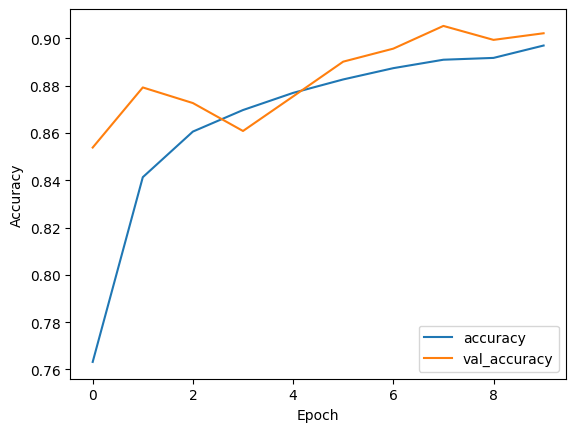

In [ ]:
history = model.fit(train_images[..., np.newaxis], train_labels, epochs=10,
                    validation_data=(test_images[..., np.newaxis], test_labels))

# Plot learning curve after adding regularization
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# 8. Data augmentation
Introduces data augmentation to artificially increase the size of the training dataset and improve the model's generalization ability.

Generating sample to augmentation based on the error matrix

In [ ]:
# Generating 20% additional augmented data
num_augmented_images = int(0.2 * train_images.shape[0])
np.random.seed(42)  # For reproducibility
augmentation_indices = np.random.choice(train_images.shape[0], num_augmented_images, replace=False)

# Apply rotation to only the selected images
augmented_images = []
augmented_labels = []

for i in augmentation_indices:
    image = train_images[i]
    label = train_labels[i]
    # Apply rotation in the range of -20 to +20 degrees using scipy
    rotated_image = rotate(image, angle=np.random.uniform(-20, 20), reshape=False, mode='nearest')
    augmented_images.append(rotated_image)
    augmented_labels.append(label)

# Convert lists to numpy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Combine original and augmented data
train_images_expanded = np.concatenate((train_images, augmented_images), axis=0)
train_labels_expanded = np.concatenate((train_labels, augmented_labels), axis=0)


In [ ]:
# Model with batch normalization and dropout
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Train the model with augmented data
Trains the model on augmented data to improve robustness to diverse input data.

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Train the model on the expanded dataset
history = model.fit(train_images_expanded, train_labels_expanded, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 123s 51ms/step - accuracy: 0.6874 - loss: 0.9027 - val_accuracy: 0.8607 - val_loss: 0.3965
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 136s 48ms/step - accuracy: 0.8303 - loss: 0.4786 - val_accuracy: 0.8790 - val_loss: 0.3490
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 142s 48ms/step - accuracy: 0.8466 - loss: 0.4219 - val_accuracy: 0.8781 - val_loss: 0.3278
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 146s 50ms/step - accuracy: 0.8592 - loss: 0.3934 - val_accuracy: 0.8718 - val_loss: 0.3446
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 138s 48ms/step - accuracy: 0.8711 - loss: 0.3642 - val_accuracy: 0.8954 - val_loss: 0.2846
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 139s 47ms/step - accuracy: 0.8756 - loss: 0.3542 - val_accuracy: 0.8918 - val_loss: 0.2934
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 142s 47ms/step - accuracy: 0.8804 - loss: 0.3318 - val_accuracy: 0.8986 - val_loss: 0.2805
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 105s 47ms/step - accuracy: 

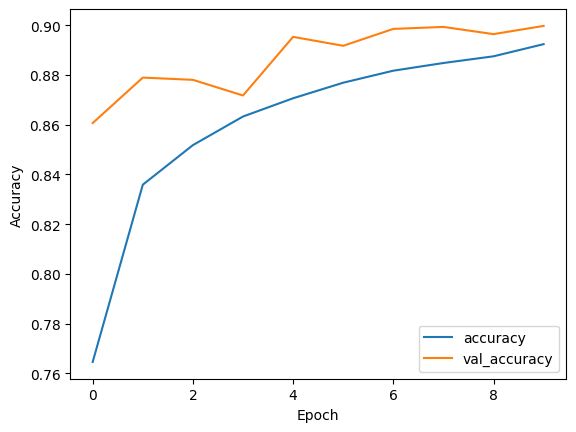

In [ ]:
# Plot learning curves
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


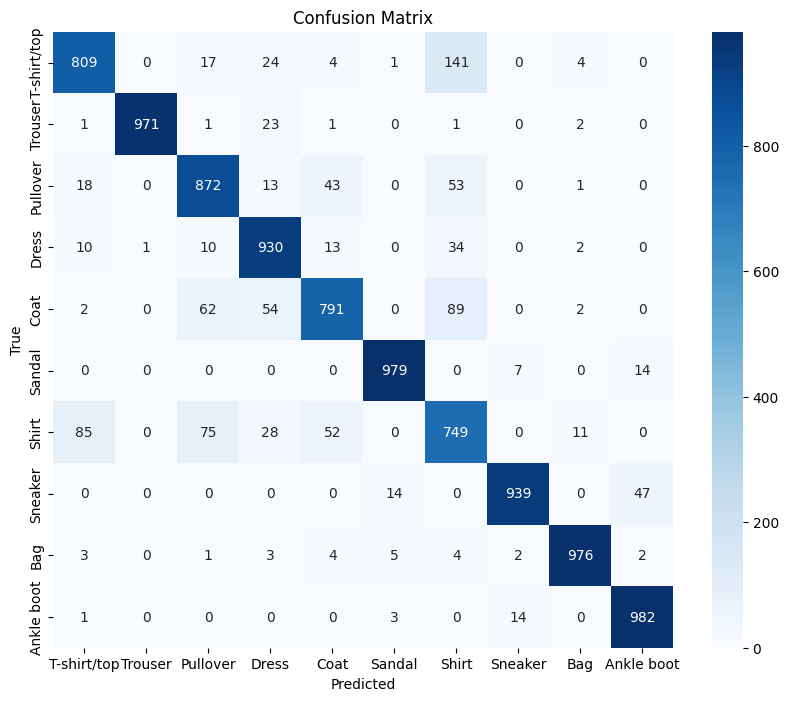

In [ ]:
# Display the confusion matrix
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(test_labels, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In order to boost the performance we should probably add a few shirt augmented examples.

# 9. Transfer Learning with VGG16
Uses transfer learning with the pre-trained VGG16 model to leverage previously learned features and adapt them to classify Fashion MNIST images.

In [6]:
# Load the pre-trained VGG16 model (without the top classification layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
  layer.trainable = False

# Add your own classification layers on top
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)  # 10 output classes for Fashion MNIST

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Resize the images to fit the VGG16 input size
train_images_resized = tf.image.resize(train_images[..., np.newaxis], [32, 32])
test_images_resized = tf.image.resize(test_images[..., np.newaxis], [32, 32])

# Convert grayscale images to RGB
train_images_rgb = tf.image.grayscale_to_rgb(train_images_resized)
test_images_rgb = tf.image.grayscale_to_rgb(test_images_resized)

# Train the model
history = model.fit(train_images_rgb, train_labels, epochs=10,
                    validation_data=(test_images_rgb, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images_rgb, test_labels)
print('Test accuracy:', test_acc)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.7155 - loss: 0.8038 - val_accuracy: 0.8349 - val_loss: 0.4540
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step - accuracy: 0.8254 - loss: 0.4789 - val_accuracy: 0.8489 - val_loss: 0.4145
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8406 - loss: 0.4347 - val_accuracy: 0.8544 - val_loss: 0.4004
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8474 - loss: 0.4174 - val_accuracy: 0.8599 - val_loss: 0.3823
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8542 - loss: 0.3989 - val_accuracy: 0.8617 - val_loss: 0.3817
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8564 - loss: 0.3897 - val_accuracy: 0.8581 - val_loss: 0.3866
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8587 - loss: 0.3807 - val_accuracy: 0.8565 - val_loss: 0.3814
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8618 - loss: 

In [19]:
# Load the pre-trained VGG16 model (without the top classification layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
  layer.trainable = False

# Add your own classification layers on top
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)  # 10 output classes for Fashion MNIST

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Resize the images to fit the VGG16 input size
train_images_resized = tf.image.resize(train_images[..., np.newaxis], [64, 64])
test_images_resized = tf.image.resize(test_images[..., np.newaxis], [64, 64])

# Convert grayscale images to RGB
train_images_rgb = tf.image.grayscale_to_rgb(train_images_resized)
test_images_rgb = tf.image.grayscale_to_rgb(test_images_resized)

# Train the model
history = model.fit(train_images_rgb, train_labels, epochs=10,
                    validation_data=(test_images_rgb, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images_rgb, test_labels)
print('Test accuracy:', test_acc)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 99s 50ms/step - accuracy: 0.7851 - loss: 0.6070 - val_accuracy: 0.8715 - val_loss: 0.3553
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 17ms/step - accuracy: 0.8596 - loss: 0.3774 - val_accuracy: 0.8752 - val_loss: 0.3365
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - accuracy: 0.8696 - loss: 0.3529 - val_accuracy: 0.8848 - val_loss: 0.3141
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8784 - loss: 0.3286 - val_accuracy: 0.8825 - val_loss: 0.3126
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8814 - loss: 0.3198 - val_accuracy: 0.8868 - val_loss: 0.3117
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8880 - loss: 0.3037 - val_accuracy: 0.8878 - val_loss: 0.3049
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.8894 - loss: 0.3000 - val_accuracy: 0.8864 - val_loss: 0.3070
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8876 -

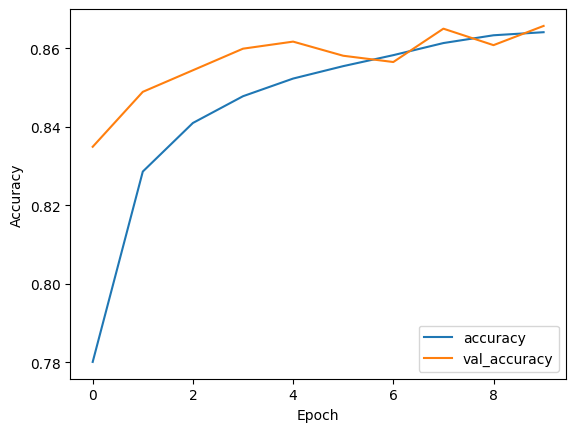

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

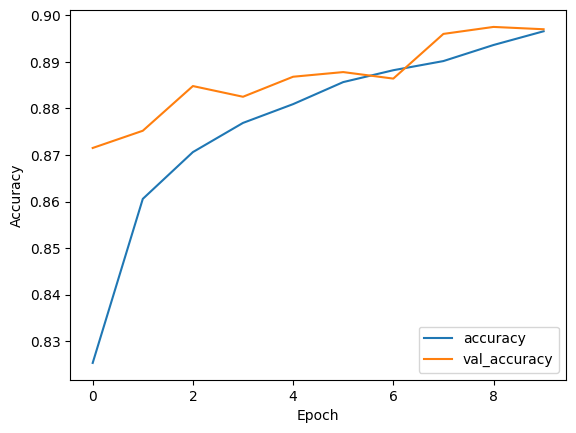

In [23]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


# Conclusion

As we can see the first, most basic model was the best one in case of this dataset. Despite this fact all the methods above can often help increasing the performance of our models.

In order to boost the performance of our models created in this notebook it could be a good idea to try different dropout values, perhaps changing from 0.5 to something like 0.3 could help with generalization of the model.